# Praktik Penggunaan Python dalam Cleaning Data dan EDA pada data English R Community Survey 2019

Pada kali ini akan dilakukan beberapa proses pengolahan data dengan keterangan sebagai berikut:
1.   Overview Data
2.   Menghapus Data Duplikat
3. Mengganti Nama Variabel 
4. Mengatasi Missing Value dan Membenarkan Tipe Data
5. Mengidentifikasi dan Menangani Outlier
6. Melakukan Eksploratory Data Analysis (Visualisasi dan Pivot Table)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#memanggil data
import pandas as pd

data=pd.read_csv("/content/drive/MyDrive/My Works/DSA/R Programming/Data Video/data cleaning-R Community Survey.csv",sep=",")
data.head()

,Timestamp,How.would.you.rate.your.level.of.experience.using.R.,What.is.the.highest.degree.or.level.of.school.you.have.completed..If.currently.enrolled..please.use.the.highest.degree.received.,In.what.country.do.you.currently.reside.,What.industry.do.you.work.or.participate.in.,How.many.people.in.your.organization.or.work.group.do.you.feel.that.you.can.ask.for.help.or.support.when.working.with.R.
0,12/15/2019 12:09:59,Beginner,Bachelor's degree,Argentina,Education,10.0
1,12/19/2019 13:14:55,Expert,Bachelor's degree,Argentina,Information Technologies,2.0
2,12/18/2019 10:51:47,Intermediate,Bachelor's degree,Argentina,Research,1.0
3,12/15/2019 19:17:52,Expert,Bachelor's degree,Australia,Political data,3.0
4,12/19/2019 8:53:34,Expert,Bachelor's degree,Australia,Professional and Business Services,20.0


# Menghapus Data Duplikat
Data akan dicek dulu panjangnya berapa dengan menggunakan syntax:

```
len(nama_dataset)
```
Kemudian, dilihat ada berapa data duplikat yang terdapat di dalam dataset menggunakan syntax:


```
nama_dataset[nama_dataset.duplicated()]
```


---



In [ ]:
#melihat panjang data (jml data)
len(data)

1564

In [ ]:
data[data.duplicated()]

,Timestamp,How.would.you.rate.your.level.of.experience.using.R.,What.is.the.highest.degree.or.level.of.school.you.have.completed..If.currently.enrolled..please.use.the.highest.degree.received.,In.what.country.do.you.currently.reside.,What.industry.do.you.work.or.participate.in.,How.many.people.in.your.organization.or.work.group.do.you.feel.that.you.can.ask.for.help.or.support.when.working.with.R.
319,01/01/2020 08:28,Beginner,Doctorate,Australia,Education,3.0


In [ ]:
#menghapus data duplikat
data1=data.drop_duplicates()
data1.head()

,Timestamp,How.would.you.rate.your.level.of.experience.using.R.,What.is.the.highest.degree.or.level.of.school.you.have.completed..If.currently.enrolled..please.use.the.highest.degree.received.,In.what.country.do.you.currently.reside.,What.industry.do.you.work.or.participate.in.,How.many.people.in.your.organization.or.work.group.do.you.feel.that.you.can.ask.for.help.or.support.when.working.with.R.
0,12/15/2019 12:09:59,Beginner,Bachelor's degree,Argentina,Education,10.0
1,12/19/2019 13:14:55,Expert,Bachelor's degree,Argentina,Information Technologies,2.0
2,12/18/2019 10:51:47,Intermediate,Bachelor's degree,Argentina,Research,1.0
3,12/15/2019 19:17:52,Expert,Bachelor's degree,Australia,Political data,3.0
4,12/19/2019 8:53:34,Expert,Bachelor's degree,Australia,Professional and Business Services,20.0


In [ ]:
len(data1)

1563

Datanya berkurang 1 baris karena hanya ada 1 data duplikat

---



# Mengganti Nama Variabel


In [ ]:
#mengubah nama varuabel
data1=data1.rename(columns={'Timestamp':'time',
                            'How.would.you.rate.your.level.of.experience.using.R.':'experience',
                            'What.is.the.highest.degree.or.level.of.school.you.have.completed..If.currently.enrolled..please.use.the.highest.degree.received.':'highest_degree',
                            'In.what.country.do.you.currently.reside.':'country',
                            'What.industry.do.you.work.or.participate.in.':'industry',
                            'How.many.people.in.your.organization.or.work.group.do.you.feel.that.you.can.ask.for.help.or.support.when.working.with.R.':'people'})
data1.head()

,time,experience,highest_degree,country,industry,people
0,12/15/2019 12:09:59,Beginner,Bachelor's degree,Argentina,Education,10.0
1,12/19/2019 13:14:55,Expert,Bachelor's degree,Argentina,Information Technologies,2.0
2,12/18/2019 10:51:47,Intermediate,Bachelor's degree,Argentina,Research,1.0
3,12/15/2019 19:17:52,Expert,Bachelor's degree,Australia,Political data,3.0
4,12/19/2019 8:53:34,Expert,Bachelor's degree,Australia,Professional and Business Services,20.0


# Mengubah Tipe Data

In [ ]:
#melihat tipe data
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1563 entries, 0 to 1563
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   time            1563 non-null   object 
 1   experience      1563 non-null   object 
 2   highest_degree  1563 non-null   object 
 3   country         1474 non-null   object 
 4   industry        1556 non-null   object 
 5   people          1437 non-null   float64
dtypes: float64(1), object(5)
memory usage: 117.8+ KB


In [ ]:
#mengganti tipe data di variabel time menjadi Date
import datetime as dt

data1['time']=pd.to_datetime(data1['time']).dt.date
data1.head()

,time,experience,highest_degree,country,industry,people
0,2019-12-15,Beginner,Bachelor's degree,Argentina,Education,10.0
1,2019-12-19,Expert,Bachelor's degree,Argentina,Information Technologies,2.0
2,2019-12-18,Intermediate,Bachelor's degree,Argentina,Research,1.0
3,2019-12-15,Expert,Bachelor's degree,Australia,Political data,3.0
4,2019-12-19,Expert,Bachelor's degree,Australia,Professional and Business Services,20.0


Tipe data di variabel people akan diubah setelah penanganan missing value

---



# Menangani Missing Value

Pada kali ini missing value akan ditangani dengan menggantikan nilainya menjadi 'unknown' pada data non-numeric dan 0 pada data numeric.


```
nama_dataset=nama_dataset.copy()
nama_dataset.fillna({'nama_variabel':'filna_dengan_nilai_apa'},inplace=True)
```



---



In [ ]:
#melihat data missing atau missing value
data1.isna()

,time,experience,highest_degree,country,industry,people
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1559,False,False,False,True,False,False
1560,False,False,False,True,False,False
1561,False,False,False,True,False,False
1562,False,False,False,True,False,False


In [ ]:
#jumlah missing data per variabel
data1.isna().sum()

time                0
experience          0
highest_degree      0
country            89
industry            7
people            126
dtype: int64

In [ ]:
#mengatasi missing value
data_bersih=data1.copy()
data_bersih.fillna({'country':'Unkown','industry':'Unkown','people':0},inplace=True)
data_bersih

,time,experience,highest_degree,country,industry,people
0,2019-12-15,Beginner,Bachelor's degree,Argentina,Education,10.0
1,2019-12-19,Expert,Bachelor's degree,Argentina,Information Technologies,2.0
2,2019-12-18,Intermediate,Bachelor's degree,Argentina,Research,1.0
3,2019-12-15,Expert,Bachelor's degree,Australia,Political data,3.0
4,2019-12-19,Expert,Bachelor's degree,Australia,Professional and Business Services,20.0
...,...,...,...,...,...,...
1559,2019-12-31,Intermediate,Master's degree,Unkown,Professional and Business Services,0.0
1560,2019-12-31,Intermediate,Master's degree,Unkown,Professional and Business Services,0.0
1561,2020-01-01,Intermediate,Master's degree,Unkown,Marketing,2.0
1562,2020-01-03,Intermediate,Master's degree,Unkown,Health Care and Medicine,6.0


In [ ]:
#masih ada missing value??
data_bersih.isna().sum()

time              0
experience        0
highest_degree    0
country           0
industry          0
people            0
dtype: int64

Dataset sudah tidak mengandung missing value

---



In [ ]:
#struktur data people
data_bersih.people=data_bersih.people.astype('int')

data_bersih.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1563 entries, 0 to 1563
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   time            1563 non-null   object
 1   experience      1563 non-null   object
 2   highest_degree  1563 non-null   object
 3   country         1563 non-null   object
 4   industry        1563 non-null   object
 5   people          1563 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 117.8+ KB


# Mengidentifikasi dan Menangani Outlier
Untuk mengidentifikasi outlier digunakan visualisasi dalam bentuk histogram dan boxplot. Sedangkan untuk melakukan penanganan outlier digunakan beberapa cara dengan trial and error yaitu z-score, quantile based flooring and capping, dan winsorizing (winsorization).

(array([1543.,   11.,    4.,    0.,    0.,    2.,    0.,    0.,    0.,
           3.]),
 array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
         900., 1000.]),
 <a list of 10 Patch objects>)

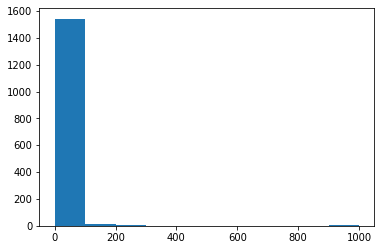

In [ ]:
#mengidentifiksi outlier dengan histogram
import matplotlib.pyplot as plt


plt.hist(data_bersih.people)

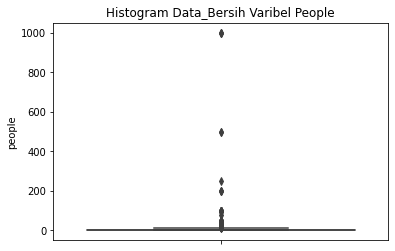

In [ ]:
import seaborn as sns

sns.boxplot(y='people',data=data_bersih).set_title('Histogram Data_Bersih Varibel People')
plt.show()

Berdasaran hasil visualisasi di atas, masih teridentifikasi adanya outlier dalam data. Hal tersebut dapat dilihat dari histogram yang terbentuk bahwa masih ada kelas yang berada jauh dari kelas lain (pencilan/outlier) atau boxplot yang terbentuk belum sempurna karena masih ada titik-titik (data) yang berada diluar batas (upper limit) yang menandakan bahwa terdapat outlier dalam data.

In [ ]:
#menangani dengan z-score
import scipy.stats as stats

#membuat variabel z-score
z=stats.zscore(data_bersih.people)
data_bersih1=data_bersih.assign(z_score=z)
data_bersih1.head()

,time,experience,highest_degree,country,industry,people,z_score
0,2019-12-15,Beginner,Bachelor's degree,Argentina,Education,10,0.057003
1,2019-12-19,Expert,Bachelor's degree,Argentina,Information Technologies,2,-0.105284
2,2019-12-18,Intermediate,Bachelor's degree,Argentina,Research,1,-0.125570
3,2019-12-15,Expert,Bachelor's degree,Australia,Political data,3,-0.084998
4,2019-12-19,Expert,Bachelor's degree,Australia,Professional and Business Services,20,0.259863


In [ ]:
#menghapus data yang memiliki z-score > 3 atau z-score < -3
data_bersihZ=data_bersih1.drop(data_bersih1[abs(data_bersih1.z_score) > 3].index)
print(data_bersihZ)


            time    experience      highest_degree    country  \
0     2019-12-15      Beginner  Bachelor's degree   Argentina   
1     2019-12-19        Expert  Bachelor's degree   Argentina   
2     2019-12-18  Intermediate  Bachelor's degree   Argentina   
3     2019-12-15        Expert  Bachelor's degree   Australia   
4     2019-12-19        Expert  Bachelor's degree   Australia   
...          ...           ...                 ...        ...   
1559  2019-12-31  Intermediate     Master's degree     Unkown   
1560  2019-12-31  Intermediate     Master's degree     Unkown   
1561  2020-01-01  Intermediate     Master's degree     Unkown   
1562  2020-01-03  Intermediate     Master's degree     Unkown   
1563  2020-01-03  Intermediate     Master's degree     Unkown   

                                industry  people   z_score  
0                              Education      10  0.057003  
1               Information Technologies       2 -0.105284  
2                               Rese

(array([1.381e+03, 1.010e+02, 3.600e+01, 9.000e+00, 3.000e+00, 1.200e+01,
        0.000e+00, 0.000e+00, 1.000e+00, 1.100e+01]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

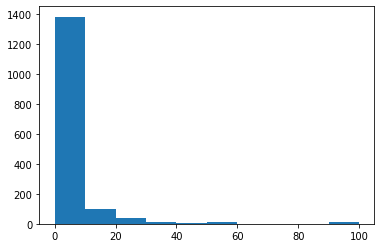

In [ ]:
#checking ulang apakah sudah bersih dari outlier?
plt.hist(data_bersihZ.people)

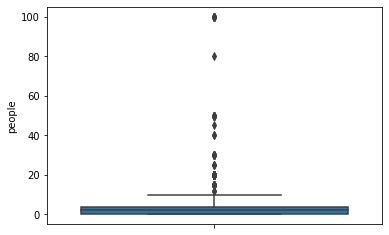

In [ ]:
sns.boxplot(y='people',data=data_bersihZ)
plt.show()

Masih terdapat outlier sehingga dicoba penanganan menggunakan metode lain.

In [ ]:
#penanganan outlier menggunakan metode quantile based flooring and capping
low=data_bersih.people.quantile(0.10)
upp=data_bersih['people'].quantile(0.90)

data_bersihFC=data_bersih.drop(data_bersih[(data_bersih.people>upp) | (data_bersih.people<low)].index)
print(data_bersihFC)

            time    experience      highest_degree    country  \
0     2019-12-15      Beginner  Bachelor's degree   Argentina   
1     2019-12-19        Expert  Bachelor's degree   Argentina   
2     2019-12-18  Intermediate  Bachelor's degree   Argentina   
3     2019-12-15        Expert  Bachelor's degree   Australia   
5     2019-12-31        Expert  Bachelor's degree   Australia   
...          ...           ...                 ...        ...   
1559  2019-12-31  Intermediate     Master's degree     Unkown   
1560  2019-12-31  Intermediate     Master's degree     Unkown   
1561  2020-01-01  Intermediate     Master's degree     Unkown   
1562  2020-01-03  Intermediate     Master's degree     Unkown   
1563  2020-01-03  Intermediate     Master's degree     Unkown   

                                            industry  people  
0                                          Education      10  
1                           Information Technologies       2  
2                             

(array([571., 196., 208., 136.,  77., 144.,  24.,  10.,  13.,  85.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

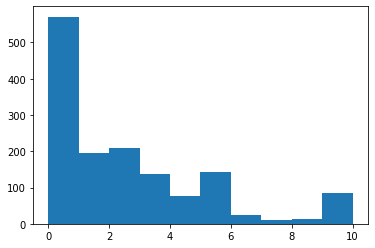

In [ ]:
plt.hist(data_bersihFC.people)

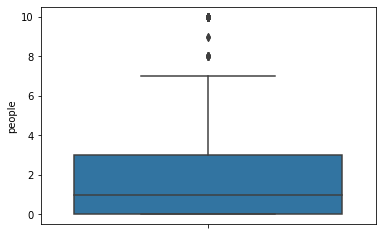

In [ ]:
sns.boxplot(y='people',data=data_bersihFC)
plt.show()

In [ ]:
low1=data_bersih.people.quantile(0.15)
upp1=data_bersih.people.quantile(0.85)

data_bersihFC1=data_bersih.drop(data_bersih[(data_bersih.people>upp1) | (data_bersih.people<low1)].index)
print(data_bersihFC1)

            time    experience      highest_degree    country  \
1     2019-12-19        Expert  Bachelor's degree   Argentina   
2     2019-12-18  Intermediate  Bachelor's degree   Argentina   
3     2019-12-15        Expert  Bachelor's degree   Australia   
5     2019-12-31        Expert  Bachelor's degree   Australia   
6     2019-12-31        Expert  Bachelor's degree   Australia   
...          ...           ...                 ...        ...   
1556  2019-12-31  Intermediate     Master's degree     Unkown   
1557  2019-12-31  Intermediate     Master's degree     Unkown   
1559  2019-12-31  Intermediate     Master's degree     Unkown   
1560  2019-12-31  Intermediate     Master's degree     Unkown   
1561  2020-01-01  Intermediate     Master's degree     Unkown   

                                            industry  people  
1                           Information Technologies       2  
2                                           Research       1  
3                             

(array([571.,   0., 196.,   0., 208.,   0., 136.,   0.,  77., 144.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

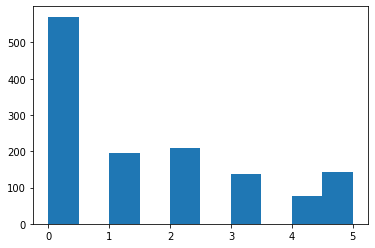

In [ ]:
plt.hist(data_bersihFC1.people)

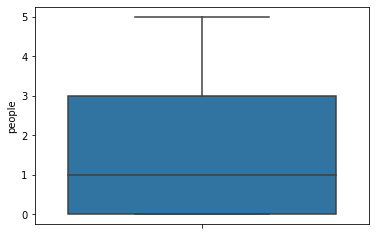

In [ ]:
sns.boxplot(y='people',data=data_bersihFC1)
plt.show()

Sudah tidak ada outlier namun datanya semakin berkurang banyak sehingga akan dicoba alternatif lain.

1563


(array([571., 196., 208., 136.,  77., 144.,  24.,  10.,  13., 184.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

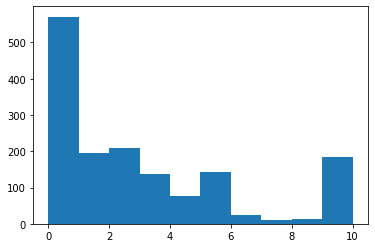

In [ ]:
#penanganan outlier dengan winsorizing
from scipy.stats.mstats import winsorize

datawin=winsorize(data_bersih.people,(0.10,0.10)) #membentuk data baru dengan winsorizing 80% 
print(len(datawin))

plt.hist(datawin) #checking ulang outlier menggunakan histogram

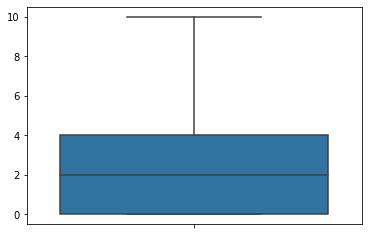

In [ ]:
sns.boxplot(y=datawin)
plt.show()

Pada kesempatan kali ini data yang digunakan adalah hasil winsorizing 80% sehingga data tersebut harus ditambahkan ke dataset untuk dianalisis dalam tahap selanjutnya (EDA).

# Eksploratory Data Analysis
Visualisasi dan Tabel Pivot

In [ ]:
datafiks=data_bersih.assign(people_winsor=datawin)

datafiks=datafiks.drop(['people'],axis=1)
datafiks.head()

,time,experience,highest_degree,country,industry,people_winsor
0,2019-12-15,Beginner,Bachelor's degree,Argentina,Education,10
1,2019-12-19,Expert,Bachelor's degree,Argentina,Information Technologies,2
2,2019-12-18,Intermediate,Bachelor's degree,Argentina,Research,1
3,2019-12-15,Expert,Bachelor's degree,Australia,Political data,3
4,2019-12-19,Expert,Bachelor's degree,Australia,Professional and Business Services,10


In [ ]:
datafiks.describe(include='all')

,time,experience,highest_degree,country,industry,people_winsor
count,1563,1563,1563,1563,1563,1563.000000
unique,28,4,3,88,121,NaN
top,2019-12-31,Intermediate,Master's degree,United States of America,Research,NaN
freq,304,913,723,596,385,NaN
mean,NaN,NaN,NaN,NaN,NaN,2.689699
std,NaN,NaN,NaN,NaN,NaN,3.232805
min,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,2.000000
75%,NaN,NaN,NaN,NaN,NaN,4.000000


In [ ]:
#analisis univariate
#variabel experience
datafiks.experience.value_counts()

Intermediate    913
Expert          478
Beginner        166
None              6
Name: experience, dtype: int64

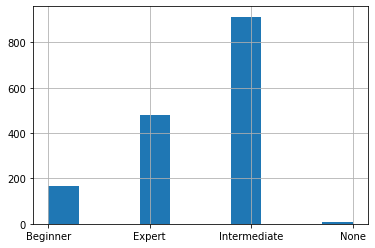

In [ ]:
datafiks.experience.hist()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


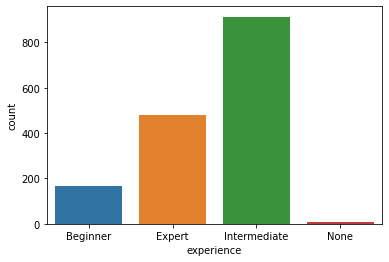

In [ ]:
#histogram yang lebih colorful
sns.countplot(datafiks.experience)

In [ ]:
#variabel highest_degree
datafiks.highest_degree.value_counts()

Master's degree       723
Doctorate             534
Bachelor's degree     306
Name: highest_degree, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


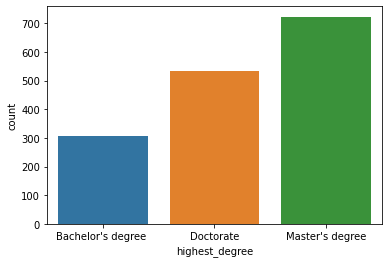

In [ ]:
sns.countplot(datafiks.highest_degree)

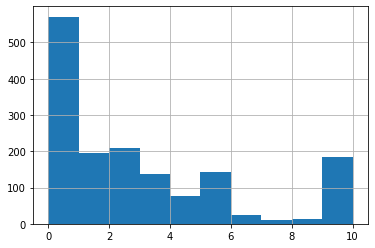

In [ ]:
#variabel people_winsor
datafiks.people_winsor.hist()

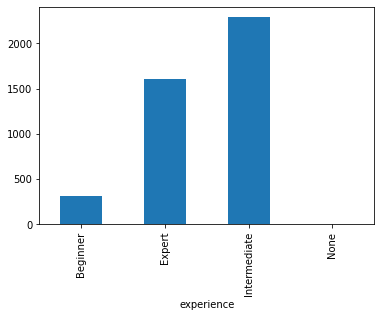

In [ ]:
#analisis bivariate
#Barchart variabel experience dan people_winsor
datafiks.groupby('experience').people_winsor.sum().plot(kind='bar')
plt.show()

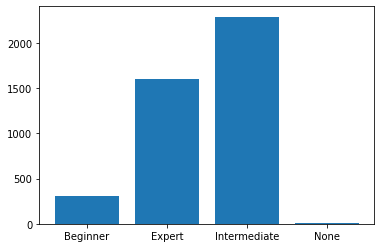

In [ ]:
#Bar
ringkasan=datafiks.groupby('experience').people_winsor.sum()
plt.bar(x=ringkasan.index,height=ringkasan.values)
plt.show()

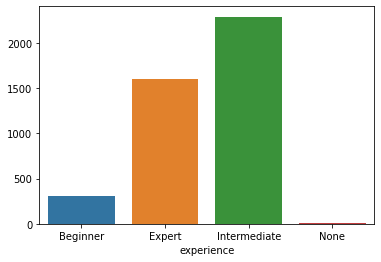

In [ ]:
#lebih colorful
sns.barplot(x=ringkasan.index,y=ringkasan.values)
plt.show()

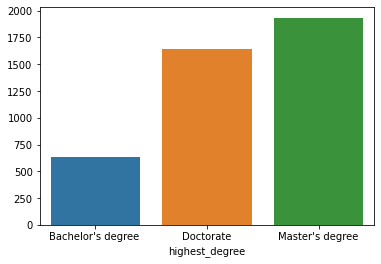

In [ ]:
#variabel highest_degree dan people_winsor
ringkas=datafiks.groupby('highest_degree').people_winsor.sum()
sns.barplot(x=ringkas.index,y=ringkas.values)
plt.show()

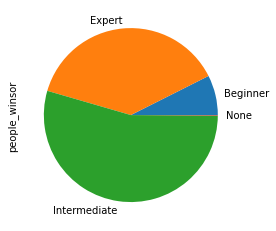

In [ ]:
#piechart
datafiks.groupby('experience').people_winsor.sum().plot(kind='pie')
plt.show()

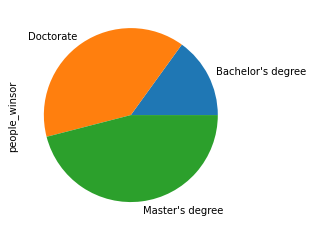

In [ ]:
datafiks.groupby('highest_degree').people_winsor.sum().plot(kind='pie')
plt.show()

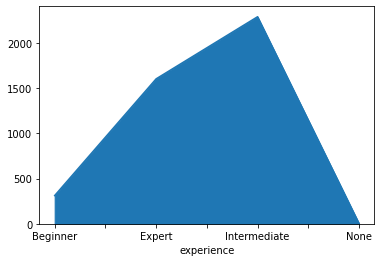

In [ ]:
#areachart
#kurang cocok untuk kasus ini
datafiks.groupby('experience').people_winsor.sum().plot(kind='area')
plt.show()

In [ ]:
pd.crosstab(datafiks.experience,datafiks.highest_degree)

highest_degree,Bachelor's degree,Doctorate,Master's degree
experience,,,
Beginner,56,41,69
Expert,62,198,218
Intermediate,186,295,432
None,2,0,4


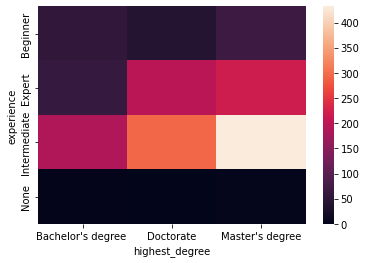

In [ ]:
sns.heatmap(pd.crosstab(datafiks.experience,datafiks.highest_degree))
plt.show()

In [ ]:
#menampilkan pivot tabel (experience,highest_degree,people_winsor)
pivot=pd.pivot_table(data=datafiks,index='experience',columns='highest_degree',values='people_winsor',aggfunc='sum')
pivot

highest_degree,Bachelor's degree,Doctorate,Master's degree
experience,,,
Beginner,88.0,88.0,136.0
Expert,184.0,708.0,709.0
Intermediate,359.0,843.0,1085.0
None,1.0,NaN,3.0


In [ ]:
#menyimpan data bersih dalam bentuk excel
datafiks.to_excel('Data Bersih R Community Survey 2019.xlsx',encoding='utf-8',index=False)